In [1]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

In [2]:
Nx, Ny = 64, 64
et = 1.0

def load(Nx,Ny,et):
    base_fn = 'output_travelling_vortex'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

[0.   0.25 0.5  0.75 1.  ] [  0.    43.75  87.5  131.25 175.  ]


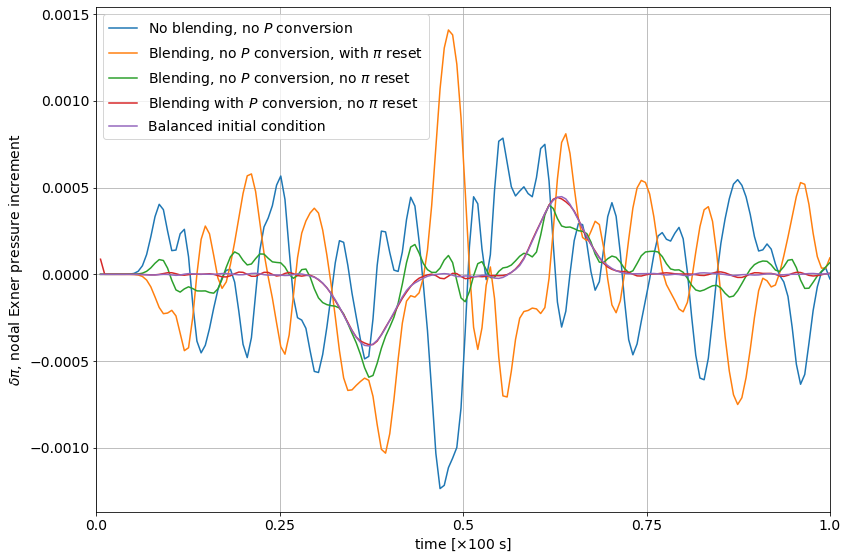

In [155]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']
attributes = ['p2_nodes']
base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
print(t_axs, t_pos)
probe_loc = [0,0]
l_typ = 'TIME'
l_typ = 'WINDOW_STEP'

pl = pt.plotter_1d(figsize=(12,8),fontsize=14,ncols=1,nrows=1)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    ens_1_suffix = 'noib'
    ens_2_suffix = 'ib_noconv_reset'
    ens_3_suffix = 'ib_noconv'
    ens_4_suffix = 'ib'
    psinc_suffix = 'bal_ic'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    psinc = get_ens(psinc_suffix, diff)

    ax = pl.get_ax(i)
    
    avg = False
    
    if diff == True: times = times[1:]
    probe_ens_1 = ens_1[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_2 = ens_2[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_3 = ens_3[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_4 = ens_4[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_psinc = psinc[:,probe_loc[0],probe_loc[1]] * p_ref
    
    
    ens_1_label = 'No blending, no $P$ conversion'
    ens_2_label = 'Blending, no $P$ conversion, with $\pi$ reset'
    ens_3_label = 'Blending, no $P$ conversion, no $\pi$ reset'
    ens_4_label = 'Blending with $P$ conversion, no $\pi$ reset'
    psinc_label = 'Balanced initial condition'
    
    ax.plot(times, probe_ens_1, label=ens_1_label)
    ax.plot(times, probe_ens_2, label=ens_2_label)
    ax.plot(times, probe_ens_3, label=ens_3_label)
    ax.plot(times, probe_ens_4, label=ens_4_label)
    ax.plot(times, probe_psinc, label=psinc_label)

    ax.set_title("")
    ax.set_xlim([times[0],times[-1]])
    ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.set_ylabel("%s" %attr_labels[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
#     ax.set_ylim([-0.0006,0.0006])
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    pl.save_fig('justification')
    
    prt.prtt('plt')

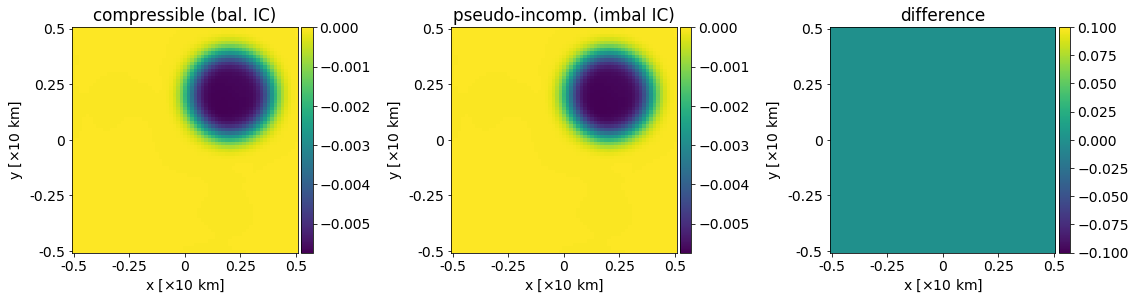

In [156]:
N = 1
sfxs = ['bal_ic','psinc_ref']

paths = []
for sfx in sfxs:
    fn = tc.get_filename(N,sfx)
    path = tc.get_path(fn)
    paths.append(path)


attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
# attributes = ['rhoY', 'rho']
attributes = ['p2_nodes']

# times = [0.0,5.0,10.0]
# times = [0.0]
times = [35]
ltags = ['ic',tags[9],tags[9]]
ltags = [tags[9]]
ldicts = pt.labels()
llabels = ['compressible (bal. IC)', 'pseudo-incomp. (imbal IC)']

t_lbl = 'WINDOW_STEP'
arr_lst = []

class oo(object):
    def __init__(self):
        None
        
oo_comp = oo()
oo_psinc = oo()

for tt,time in enumerate(times):
    tag = ltags[tt]
    for atr_idx, attribute in enumerate(attributes):
        for pp, path in enumerate(paths):
            arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0]
            arr = arr.T
        
            if pp == 0:
                setattr(oo_comp,attribute,arr)
            if pp == 1:
                setattr(oo_psinc,attribute,arr)
        
            arr_lst.append([arr, llabels[pp]])
arr_lst.append([oo_comp.p2_nodes - oo_psinc.p2_nodes, 'difference'])

ncolslen = len(times) * len(attributes)
ncolslen = 3
fs = (16,6)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)
x_axs = [-0.5,-0.25,0,0.25,0.5]
y_axs = [-0.5,-0.25,0,0.25,0.5]
x_loc = np.linspace(0,Nx,5)
y_loc = np.linspace(0,Ny,5)
x_label = r'x [$\times 10$ km]'
y_label = r'y [$\times 10$ km]'
pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='imshow')
pl.save_fig('vortex_view')

[0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7 ] [ 95.          95.6122449   96.2244898   96.83673469  97.44897959
  98.06122449  98.67346939  99.28571429  99.89795918 100.51020408
 101.12244898 101.73469388 102.34693878 102.95918367 103.57142857
 104.18367347 104.79591837 105.40816327 106.02040816 106.63265306
 107.24489796 107.85714286 108.46938776 109.08163265 109.69387755
 110.30612245 110.91836735 111.53061224 112.14285714 112.75510204
 113.36734694 113.97959184 114.59183673 115.20408163 115.81632653
 116.42857143 117.04081633 117.65306122 118.26530612 118.87755102
 119.48979592 120.10204082 120.71428571 121.32653061 121.93877551
 122.55102041 123.16326531 123.7755102  124.3877551  125.        ]


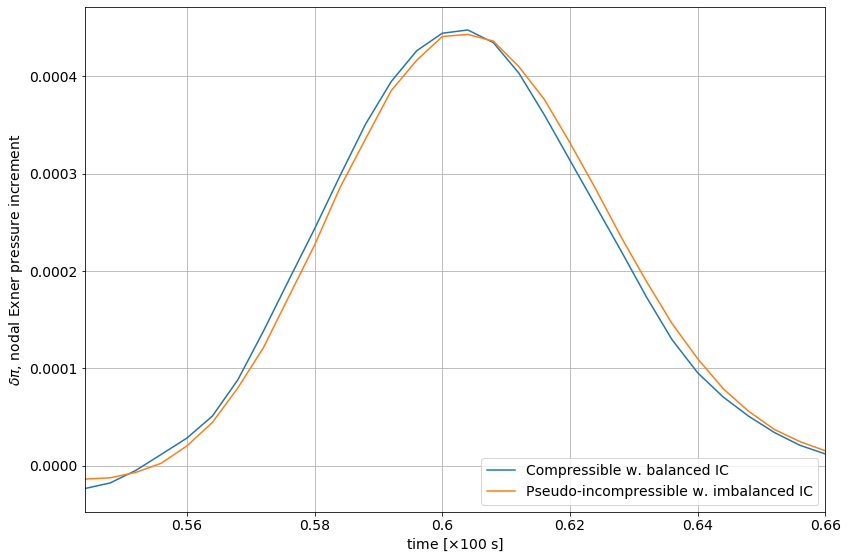

In [144]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']
attributes = ['p2_nodes']
base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)
times = times[95:126]
t_axs = np.arange(0.0,1.02,0.02)
low = int(95/175*51)
high = int(126/175*51)
t_axs = t_axs[low:high]
# t_axs = t_axs[95:126]
t_pos = np.linspace(times[0],times[-1])
# t_pos = t_pos[95:126]
print(t_axs, t_pos)
probe_loc = [0,0]
l_typ = 'TIME'
l_typ = 'WINDOW_STEP'

pl = pt.plotter_1d(figsize=(12,8),fontsize=14,ncols=1,nrows=1)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    ens_1_suffix = 'bal_ic'
    psinc_suffix = 'psinc_ref'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    psinc = get_ens(psinc_suffix, diff)

    ax = pl.get_ax(i)
    
    avg = False
    
    if diff == True: times = times[1:]
    probe_ens_1 = ens_1[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_psinc = psinc[:,probe_loc[0],probe_loc[1]] * p_ref
    
    
    ens_1_label = 'Compressible w. balanced IC'
    psinc_label = 'Pseudo-incompressible w. imbalanced IC'
    
    ax.plot(times, probe_ens_1, label=ens_1_label)
    ax.plot(times, probe_psinc, label=psinc_label)

    ax.set_title("")
    ax.set_xlim([times[0],times[-1]])
#     ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.set_ylabel("%s" %attr_labels[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
#     ax.set_ylim([-0.0006,0.0006])
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    pl.save_fig('probe_view')
    
    prt.prtt('plt')

[0.   0.25 0.5  0.75 1.  ] [  0.    43.75  87.5  131.25 175.  ]


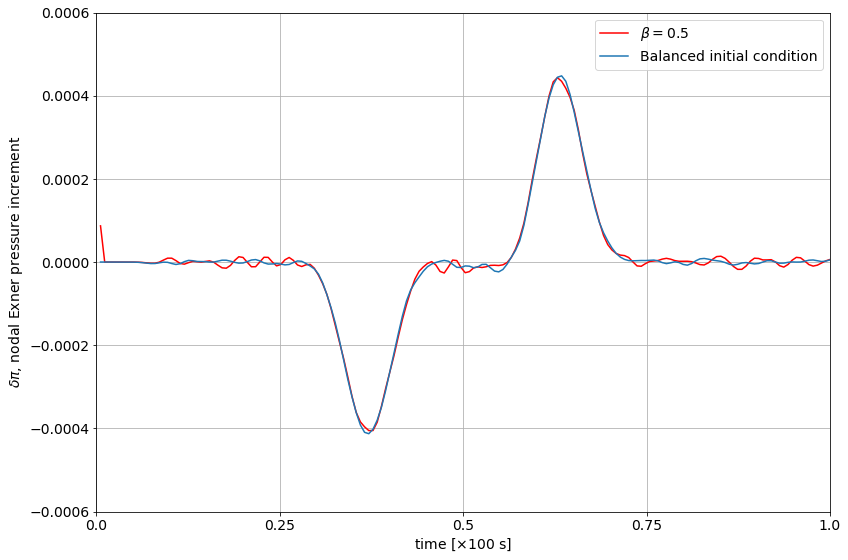

In [154]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']
attributes = ['p2_nodes']
base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
print(t_axs, t_pos)
probe_loc = [0,0]
l_typ = 'TIME'
l_typ = 'WINDOW_STEP'

pl = pt.plotter_1d(figsize=(12,8),fontsize=14,ncols=1,nrows=1)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    ens_1_suffix = 'ib-16'
    ens_2_suffix = 'ib-8'
    ens_3_suffix = 'ib-0'
    psinc_suffix = 'bal_ic'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    psinc = get_ens(psinc_suffix, diff)

    ax = pl.get_ax(i)
    
    avg = False
    
    if diff == True: times = times[1:]
    probe_ens_1 = ens_1[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_2 = ens_2[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_ens_3 = ens_3[:,probe_loc[0],probe_loc[1]] * p_ref
    probe_psinc = psinc[:,probe_loc[0],probe_loc[1]] * p_ref
    
    ens_1_label = r'$\beta=0.0$'
    ens_2_label = r'$\beta=0.5$'
    ens_3_label = r'$\beta=1.0$'
    psinc_label = 'Balanced initial condition'
    
    ax.plot(times, probe_ens_1, label=ens_1_label)
    ax.plot(times, probe_ens_2, 'r', label=ens_2_label)
    ax.plot(times, probe_ens_3, label=ens_3_label)
    ax.plot(times, probe_psinc, label=psinc_label)

    ax.set_title("")
    ax.set_xlim([times[0],times[-1]])
    ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.set_ylabel("%s" %attr_labels[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.set_ylim([-0.0006,0.0006])
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    pl.save_fig('time_shift_improvements')
    
    prt.prtt('plt')